In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import optimize

In [2]:
meta_data= pd.read_csv("C:/Users/LARBI/Desktop/traveaux master2 info/semestre2/etude de cas decisionnel/data/training_set_metadata.csv")

meta_data.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [3]:
training_set = pd.read_csv("C:/Users/LARBI/Desktop/traveaux master2 info/semestre2/etude de cas decisionnel/data/training_set.csv")
training_set.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [4]:
%matplotlib inline

In [5]:
targets = np.hstack([np.unique(meta_data['target']), [99]])
target_map = {j:i for i, j in enumerate(targets)}
target_ids = [target_map[i] for i in meta_data['target']]
meta_data['target_id'] = target_ids

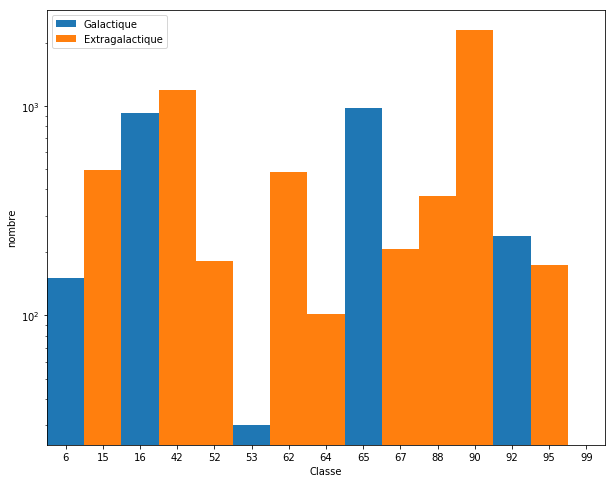

In [6]:
galactic_cut = meta_data['hostgal_specz'] == 0
plt.figure(figsize=(10, 8))
plt.hist(meta_data[galactic_cut]['target_id'], 15, (0, 15), label='Galactique')
plt.hist(meta_data[~galactic_cut]['target_id'], 15, (0, 15), label='Extragalactique')
plt.xticks(np.arange(15)+0.5,   targets)
plt.gca().set_yscale("log")
plt.xlabel('Classe')
plt.ylabel('nombre')
plt.xlim(0, 15)
plt.legend();

In [7]:
target_types={6:'Microlensing', 15:'Explosive Type V', 16:'Transits', 42:'Explosive type W', 52:'Explosive Type X', 
                  53:'Long periodic', 62:'Explosive Type Y', 64:'Near Burst', 65:'Flare', 67:'Explosive Type Z',
                  88:'AGN', 90:'SN Type U', 92:'Periodic', 95:'SN Type T'}


In [8]:
object_list=times.groupby('object_id').apply(lambda x: x['object_id'].unique()[0]).tolist()


NameError: name 'times' is not defined

In [ ]:
colors = ['purple', 'blue', 'green', 'orange', 'red', 'black']

def plot_one_object(obj_id):
        
    for band in range(len(colors)):
        sample = train_series[(train_series['object_id'] == obj_id) & (train_series['passband']==band)]
        plt.errorbar(x=sample['mjd'],y=sample['flux'],yerr=sample['flux_err'],c = colors[band],fmt='o',alpha=0.7)

In [ ]:
for t in sorted(meta_data['target'].unique()):
    print (t,meta_data[meta_data['target']== t]['target'].count(),target_types[t],meta_data[meta_data['target']== t]['hostgal_specz'].mean())

In [ ]:
null_columns=meta_data.columns[meta_data.isnull().any()]
meta_data[null_columns].isnull().sum()

In [ ]:
groups = training_set.groupby(['object_id', 'passband'])

In [ ]:
times = groups.apply(
    lambda block: block['mjd'].values).reset_index().rename(columns={0: 'seq'})
flux = groups.apply(
    lambda block: block['flux'].values
).reset_index().rename(columns={0: 'seq'})
err = groups.apply(
    lambda block: block['flux_err'].values
).reset_index().rename(columns={0: 'seq'})
det = groups.apply(
    lambda block: block['detected'].astype(bool).values
).reset_index().rename(columns={0: 'seq'})
times_list = times.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
flux_list = flux.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
err_list = err.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
det_list = det.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()


In [ ]:
flux.head()

In [ ]:
object_list=times.groupby('object_id').apply(lambda x: x['object_id'].unique()[0]).tolist()


In [ ]:
colors = ['purple', 'blue', 'green', 'orange', 'red', 'black']

def plot_one_object(obj_id):
        
    for band in range(len(colors)):
        sample = training_set[(training_set['object_id'] == obj_id) & (training_set['passband']==band)]
        plt.errorbar(x=sample['mjd'],y=sample['flux'],yerr=sample['flux_err'],c = colors[band],fmt='o',alpha=0.7)

In [ ]:
for t in sorted(meta_data['target'].unique()):
    print (t,meta_data[meta_data['target']== t]['target'].count(),target_types[t],meta_data[meta_data['target']== t]['hostgal_specz'].mean())

In [ ]:
def fit_kernel_length_only(times_band,flux_band,err_band):
    
    def _kernel_likelihood(length):
        sigma=siguess
        #length=params
        kernel=np.exp(-(np.reshape(times_band,(-1,1)) - times_band)**2/2/length**2)
        np.fill_diagonal(kernel,0)
        sumw=kernel.dot(1./err_band**2) + 1./sigma**2
        pred=kernel.dot(flux_band/err_band**2) / sumw
        chi2 = (pred - flux_band)**2 / ( err_band**2 + 1./sumw )
        # -2 ln likelihood
        logl=np.sum(chi2 + np.log(err_band**2 + 1./sumw))
        return logl
    
    lguess=(np.max(times_band)-np.min(times_band))/len(times_band)
    siguess=np.std(flux_band)
    output=optimize.fmin(_kernel_likelihood,lguess,disp=False,xtol=0.01,full_output=1)
    return (siguess,output[0][0]), output[1]

In [ ]:
def kernel_predict(params,times_band,flux_band,err_band):
    sigma=params[0]
    length=params[1]
    kernel=np.exp(-(np.reshape(time_grid,(-1,1)) - times_band)**2/2/length**2)
    sumw=kernel.dot(1./err_band**2) + 1./sigma**2
    pred=kernel.dot(flux_band/err_band**2) / sumw
    return pred, np.sqrt(1./sumw)

In [ ]:
def make_kernel(tlist,flist,elist,fit_kernel_function=fit_kernel_length_only):
    flux_grid = []
    err_grid = []
    kernel_sigma = []
    kernel_length = []
    kernel_logl=[]
    for iobj,(times_obj,flux_obj,err_obj) in enumerate(zip(tlist,flist,elist)):
        flux_grid_obj=[]
        err_grid_obj=[]
        kernel_sigma_obj = []
        kernel_length_obj = []
        kernel_logl_obj=[]
        if iobj in meta_data[meta_data['hostgal_photoz']!=0.0].index:
            for times_band,flux_band,err_band in zip(times_obj,flux_obj,err_obj):
                (sigma,length),logl = fit_kernel_function(times_band,flux_band,err_band)
                k_flux,k_err=kernel_predict((sigma,length),times_band,flux_band,err_band)
                flux_grid_obj.append(k_flux)
                err_grid_obj.append(k_err)
                kernel_sigma_obj.append(sigma)
                kernel_length_obj.append(length)
                kernel_logl_obj.append(logl)
        else:
            kernel_sigma_obj=[0]*6
            kernel_length_obj=[0]*6
            kernel_logl_obj=[0]*6
        flux_grid.append(flux_grid_obj)
        err_grid.append(err_grid_obj)
        kernel_sigma.append(kernel_sigma_obj)
        kernel_length.append(kernel_length_obj)
        kernel_logl.append(kernel_logl_obj)
    return flux_grid,err_grid, kernel_sigma, kernel_length,kernel_logl

In [ ]:
iobj=1
band=3
time_grid=(np.arange(59550,60705,5.))
(sigma,length),logl = fit_kernel_length_only(times_list[iobj][band],flux_list[iobj][band],err_list[iobj][band])
#length=4.0
k_flux,k_err=kernel_predict((sigma,length),times_list[iobj][band],flux_list[iobj][band],err_list[iobj][band])
plt.errorbar(times_list[iobj][band],flux_list[iobj][band],yerr=err_list[iobj][band],color=colors[band],fmt='o')
plt.plot(time_grid,k_flux)
plt.fill_between(time_grid,k_flux-k_err,k_flux+k_err,alpha=0.3)
plt.ylim(np.min(flux_list[iobj][band]*1.5,0),np.max(flux_list[iobj][band]*1.5,0))
#plt.xlim(60100,60300)
print (sigma,length,logl)

In [ ]:
klonly_flux_grid,klonly_err_grid,klonly_sigma,klonly_length,klonly_logl = make_kernel(
    times_list,flux_list,err_list,fit_kernel_function=fit_kernel_length_only)

In [ ]:
def plot_interpolations(iobj,times_list,flux_list,err_list,flux_grid,err_grid):
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
    plt.title(target_types[meta_data.loc[iobj,'target']]) 
    for band in range(6):
        ax = axes[band // 3, band % 3]
        ax.errorbar(times_list[iobj][band],flux_list[iobj][band],yerr=err_list[iobj][band],color=colors[band],fmt='o')
        ax.plot(time_grid,flux_grid[iobj][band],color=colors[band])
        ax.fill_between(time_grid,flux_grid[iobj][band]-err_grid[iobj][band],
                        flux_grid[iobj][band]+err_grid[iobj][band],alpha=0.3,color=colors[band])
        ax.set_xlabel('MJD')
        ax.set_ylabel('Flux')
    plt.title(target_types[meta_data.loc[iobj,'target']])
plot_interpolations(300,times_list,flux_list,err_list,klonly_flux_grid,klonly_err_grid)
#plt.ylim(-50,200)
plt.xlim(60000,60250)

In [ ]:
for iobj in meta_data[(meta_data['ddf']==0)]['object_id'][:25]:
   plt.figure()
   plot_one_object(iobj)

In [ ]:
x1=meta_data["hostgal_specz"].tolist()
x2=meta_data["hostgal_photoz"].tolist()
plt.scatter(x1, meta_data["distmod"],color = 'red');
plt.scatter(x2, meta_data["distmod"],color = 'blue');

In [ ]:
true_photoz= meta_data[~meta_data.hostgal_specz.isna()==~meta_data.hostgal_photoz.isna()]
true_photoz.plot.scatter(x="hostgal_specz", y="hostgal_photoz",color = 'green');

In [ ]:
meta_data.plot.scatter(x="gal_l", y="ra")

In [ ]:
meta_data.plot.scatter(x="decl", y="gal_b")

In [ ]:

plt.figure(figsize=(15,5))
sns.heatmap(meta_data.corr(), annot=True, fmt=".1f", cmap="RdYlBu");

In [ ]:
# lest attribut correles dans les metadata sont:
#distmod et hostgal_fotoz.
#target et target_id
#decl avec gal_l
#ddf avec object_id

In [ ]:

plt.figure(figsize=(15,5))
sns.heatmap(training_set.corr(), annot=True, fmt=".1f", cmap="RdYlBu");